# Breast cancer Wisconsin dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 699 - Features 9 - Class 2
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


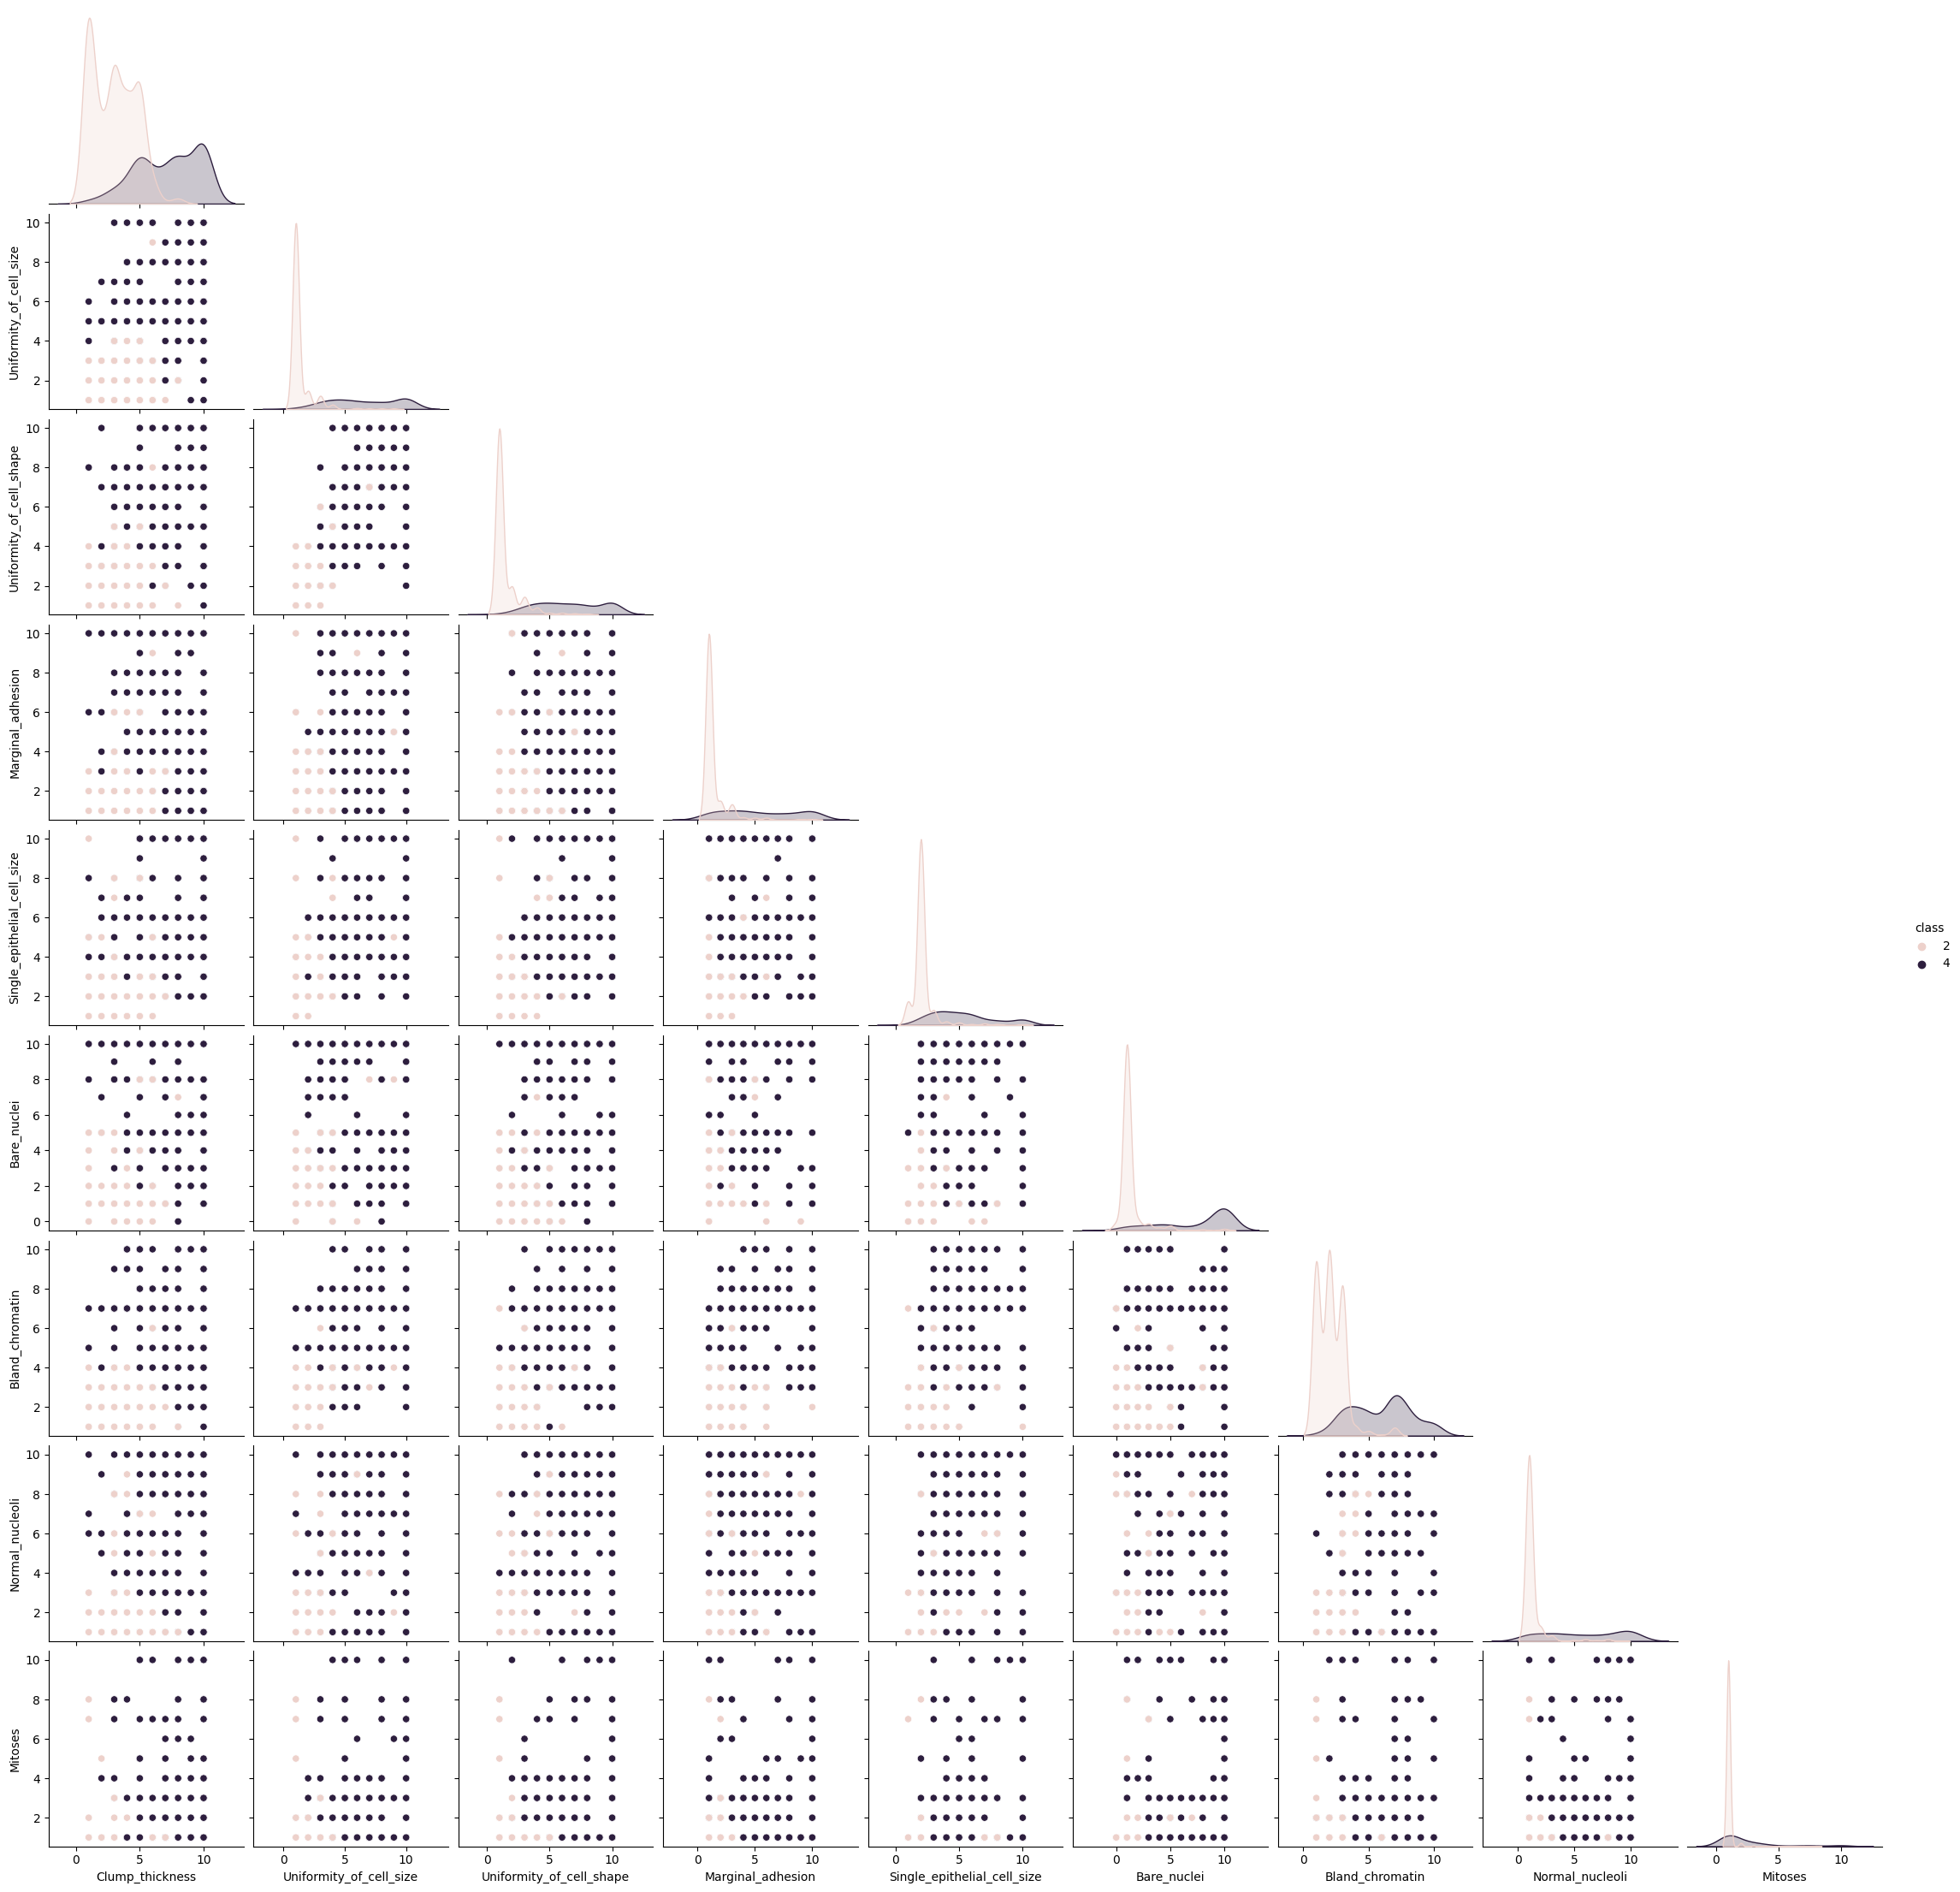

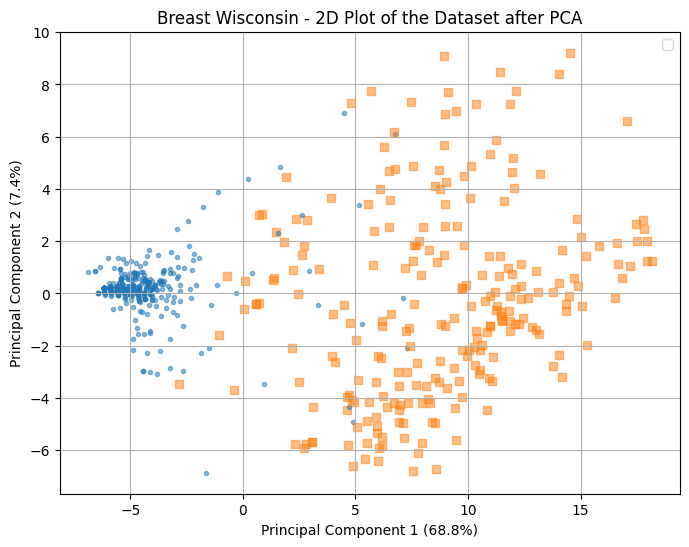

In [2]:

# fetch dataset
df = fetch_ucirepo(id=15)

X = df.data.features
X = X.fillna(0)
y = df.data.targets
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Breast Wisconsin", matrix_plot=True)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [5]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [139.95097223874384, 139.95097459471356, 139.951009147092, 139.95105142043593, 139.95116127029385, 139.95127063480112, 139.95131947387532, 139.95276071206365, 139.95308448727985, 139.9538214278189]
ARI values: [0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078, 0.7862083459275078]
NS values: [0.559635712363321, 0.996501020489087, 0.9965115391779209, 0.9965264599050792, 0.9965603215784761, 0.5596105790957245, 0.5596080917414755, 0.5595340168660031, 0.9969288169812858, 0.5594949036839023]
NMI values: [0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232, 0.6786770944890232]


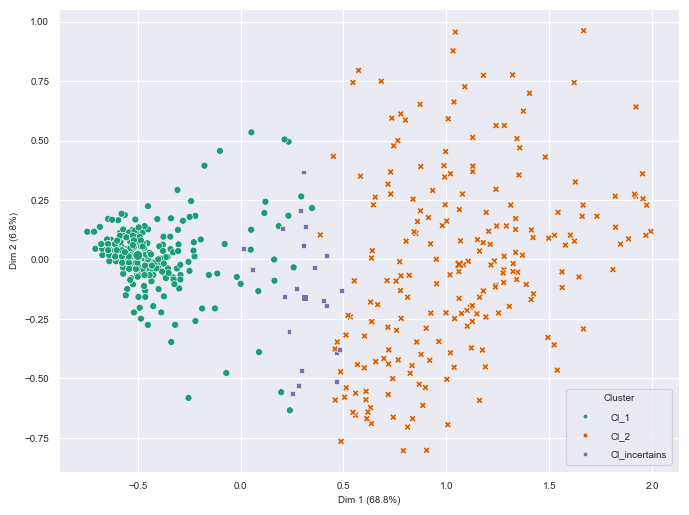

In [6]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [5]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsilon=1e-5, stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.6248872858620396, 0.744868822070936, 0.7448688477761901, 0.7448689371328485, 0.7448689708817255, 0.7448689830762386, 0.7448689999691267, 0.7448691203059856, 0.7448691442639456, 0.7448691703490995]
ARI values: [0.3961505037508248, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737, 0.30261444043775737]
NS values: [2.604453461104688, 0.23858050513862536, 0.9944740564506299, 0.23858119370597594, 0.9944756646831516, 0.9944756089180715, 0.23858190017302117, 0.23858228159888364, 0.99447783636504, 0.23858255512564064]
NMI values: [0.3530561483431149, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052, 0.272683127752052]


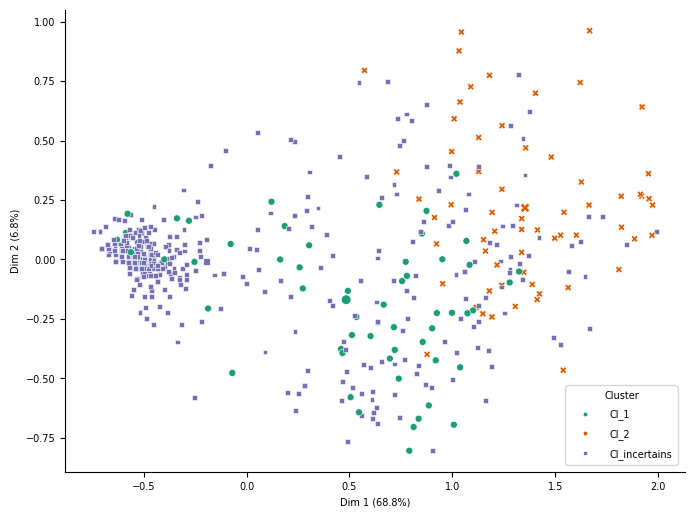

In [6]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [23]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="none")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [1.026652612274157, 1.0266526123622675, 1.0266526127787805, 1.0266526140882561, 1.0266526174348156, 1.0266526218527372, 1.0266526234750868, 1.0266526350302525, 1.0266526410058168, 1.0266526586936733]
ARI values: [0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371, 0.2913983782628371]
NMI values: [0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534, 0.2635339679214534]


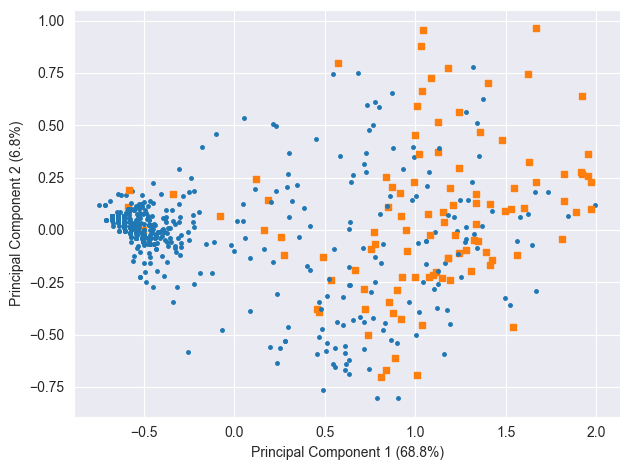

In [24]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [37]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.2, verbose=True, init="None")
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [5.522674862806094, 5.522701877489346]
ARI values: [0.8125386390700121, 0.8125386390700121]
NMI values: [0.7044529796654715, 0.7044529796654715]


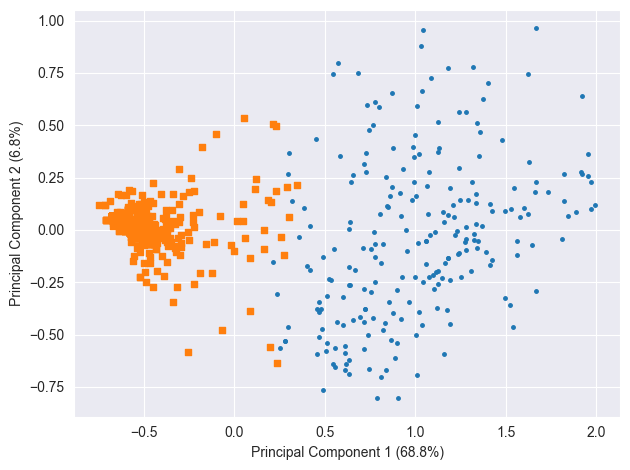

In [38]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [35]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, init="None", epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [58.34857625237581, 58.348576369505736, 58.34857672584606, 58.34857673344272, 58.34857675262532, 58.34857681011396, 58.34857684579457, 58.34857686533543, 58.348576922106815, 58.348576929462396]
ARI values: [0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721, 0.7968009846821721]
NMI values: [0.6865804648017525, 0.6865804648017527, 0.6865804648017525, 0.6865804648017527, 0.6865804648017525, 0.6865804648017525, 0.6865804648017527, 0.6865804648017525, 0.6865804648017525, 0.6865804648017525]


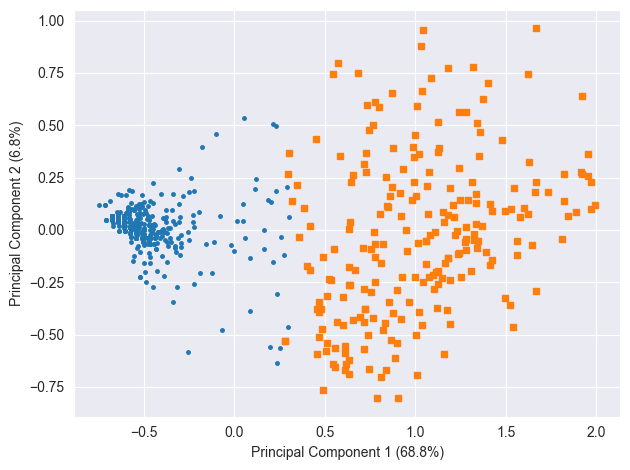

In [36]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [33]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [1.855971030811204, 1.8559711337476854, 1.8559711897003197, 1.8559713020618736, 1.8559713708784047, 1.8559713790949255, 1.8559713939799756, 1.8559714870669999, 1.8559715393774974, 1.8559716269324458]
ARI values: [0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321, 0.7244243634531321]
NMI values: [0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215, 0.6255258424192215]


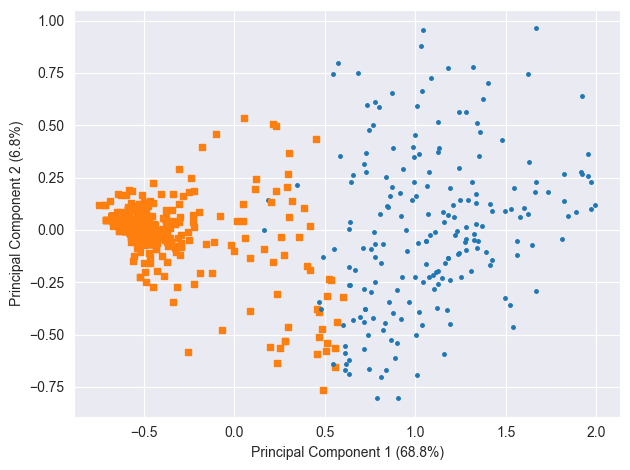

In [34]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [31]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-6)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [2.1520743372587403, 2.1520752271241728, 2.1520752529614184, 2.1520752940181813, 2.1520753582024024, 2.1520753804566564, 2.152075382620332, 2.1520754091773764, 2.152075452266341, 2.152075554066168]
ARI values: [0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121, 0.8125386390700121]
NMI values: [0.7044529796654715, 0.7044529796654716, 0.7044529796654716, 0.7044529796654716, 0.7044529796654716, 0.7044529796654716, 0.7044529796654716, 0.7044529796654715, 0.7044529796654716, 0.7044529796654716]


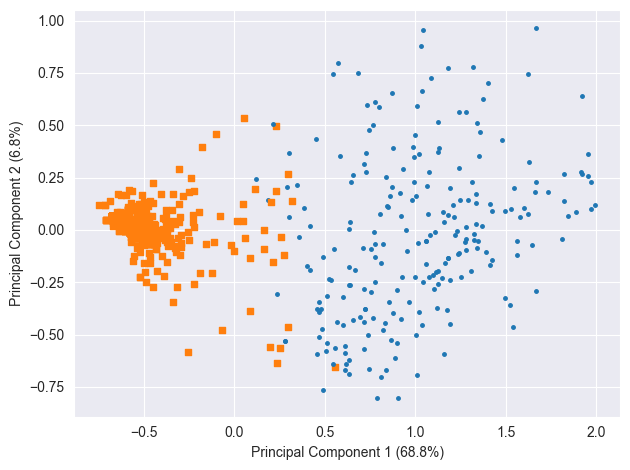

In [32]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [29]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [20.526971245055115, 20.526971449067034, 20.52697154881458, 20.52697214927226, 20.526972217050776, 20.526972229101958, 20.52697225988648, 20.52697229957353, 20.52697232663275, 20.52697238589386]
ARI values: [0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805, 0.8231018070146805]
NMI values: [0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177, 0.7168045705821177]


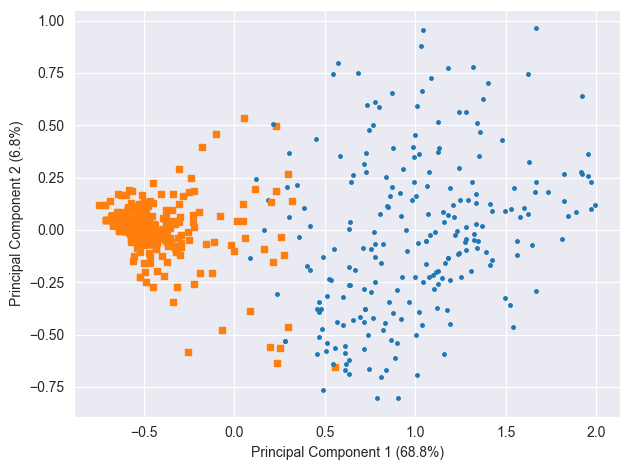

In [30]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)